In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-images/TomatoEarlyBlight6.JPG
/kaggle/input/test-images/TomatoYellowCurlVirus4.JPG
/kaggle/input/test-images/TomatoYellowCurlVirus6.JPG
/kaggle/input/test-images/PotatoHealthy2.JPG
/kaggle/input/test-images/TomatoYellowCurlVirus5.JPG
/kaggle/input/test-images/PotatoEarlyBlight2.JPG
/kaggle/input/test-images/TomatoYellowCurlVirus3.JPG
/kaggle/input/test-images/TomatoEarlyBlight3.JPG
/kaggle/input/test-images/CornCommonRust2.JPG
/kaggle/input/test-images/AppleScab3.JPG
/kaggle/input/test-images/TomatoEarlyBlight5.JPG
/kaggle/input/test-images/TomatoHealthy2.JPG
/kaggle/input/test-images/CornCommonRust1.JPG
/kaggle/input/test-images/PotatoEarlyBlight4.JPG
/kaggle/input/test-images/TomatoEarlyBlight2.JPG
/kaggle/input/test-images/TomatoYellowCurlVirus2.JPG
/kaggle/input/test-images/CornCommonRust3.JPG
/kaggle/input/test-images/TomatoEarlyBlight4.JPG
/kaggle/input/test-images/AppleCedarRust3.JPG
/kaggle/input/test-images/TomatoHealthy3.JPG
/kaggle/input/test-images/AppleS

In [2]:
#  Imports
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from skimage.measure import label, regionprops

2025-06-30 07:32:54.283139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751268774.470840      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751268774.533096      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
# STEP 1: Append the src path
import sys
sys.path.append("/kaggle/input/source5/src")

# STEP 2: Force reload utils
import importlib
import utils
importlib.reload(utils)

# STEP 3: Import the functions
from utils import preprocess_image


In [40]:
!ls /kaggle/input/source5/src


utils.py


In [ ]:
#  Load Trained Model
model = load_model('/kaggle/input/crop_health_unet_model.h5/tensorflow2/default/1/crop_health_unet_model.h5')

In [45]:
# Define test image folder
TEST_IMAGE_FOLDER = "/kaggle/input/test-images"  # change as per your uploaded folder name

# Collect image paths
image_paths = [os.path.join(TEST_IMAGE_FOLDER, f) for f in os.listdir(TEST_IMAGE_FOLDER) if f.lower().endswith(".jpg")]
print(f"Found {len(image_paths)} test images.")


Found 33 test images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


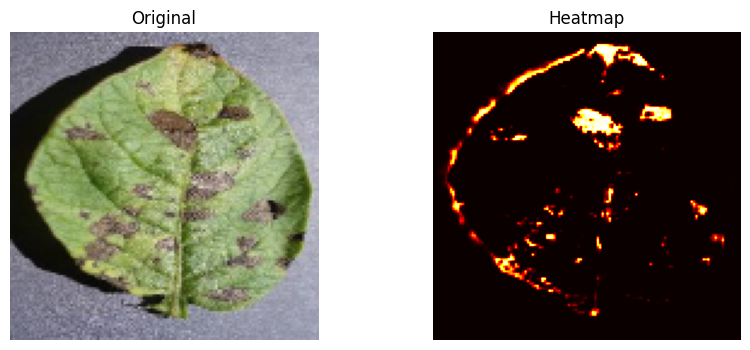

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


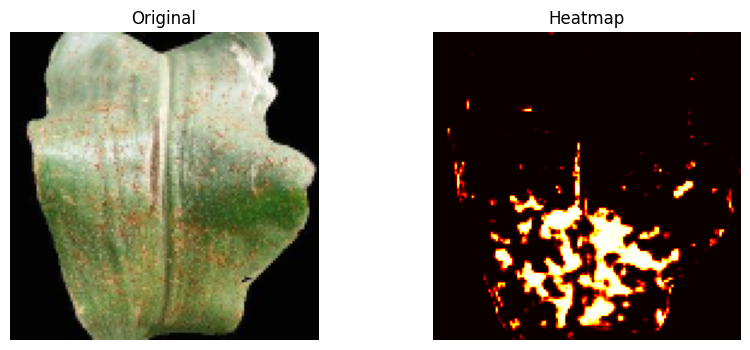

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


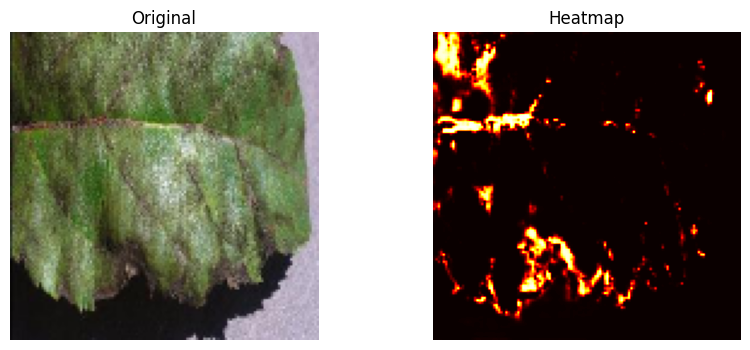

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


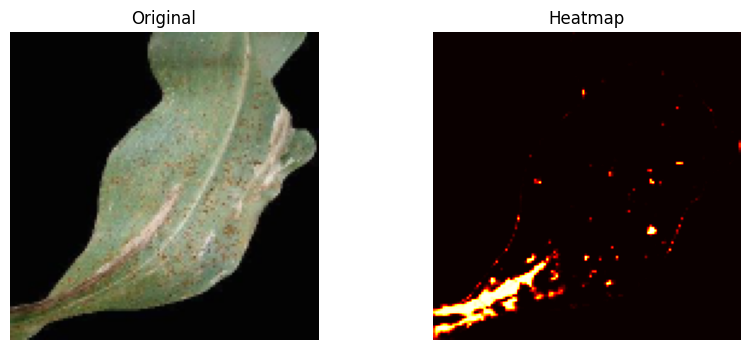

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


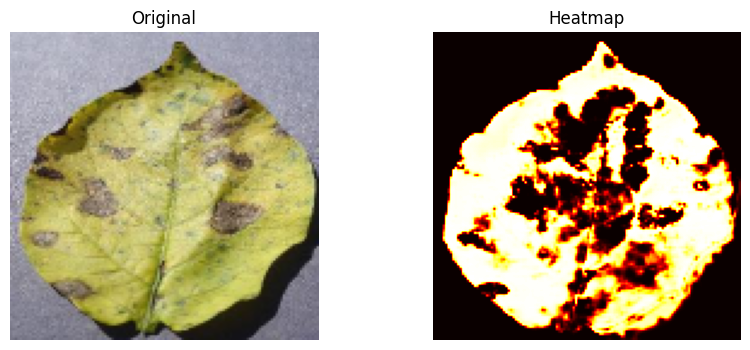

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


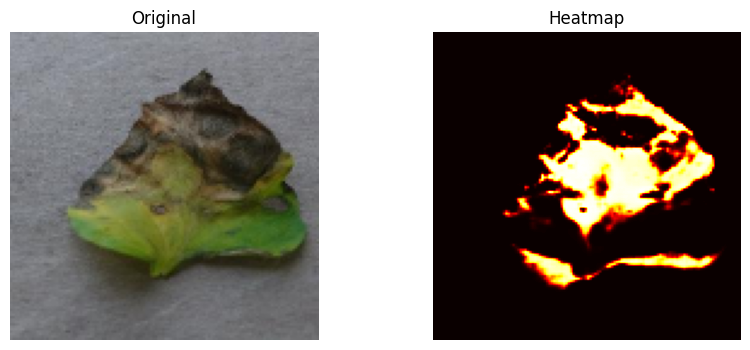

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


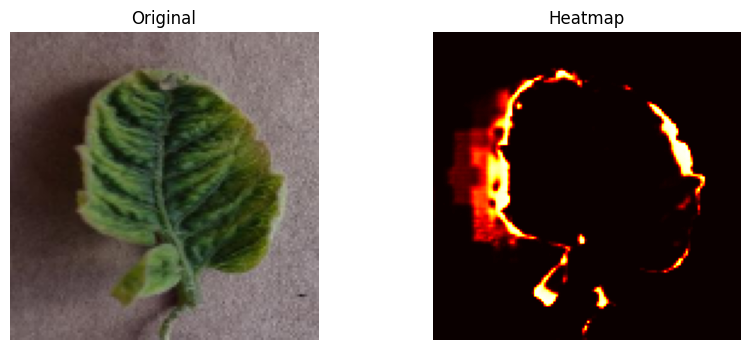

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


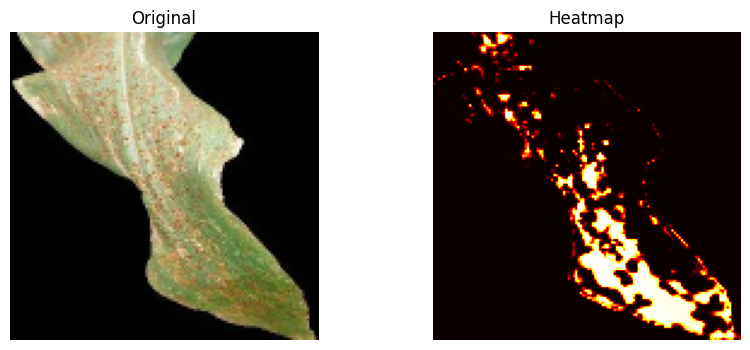

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


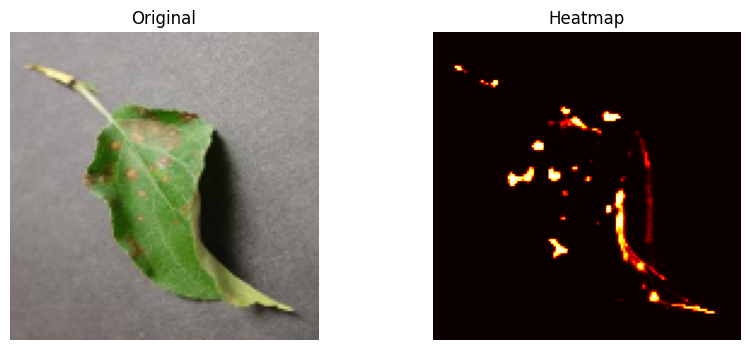

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


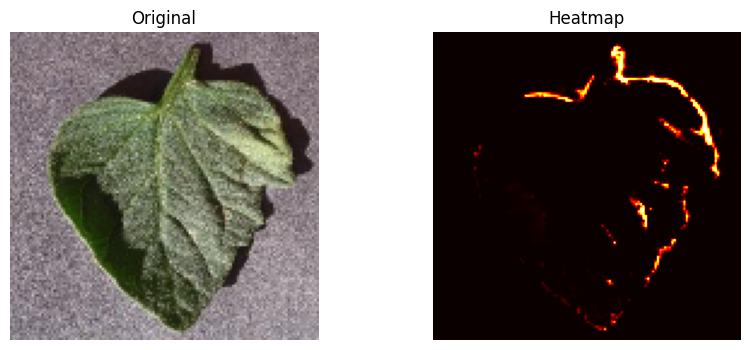

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


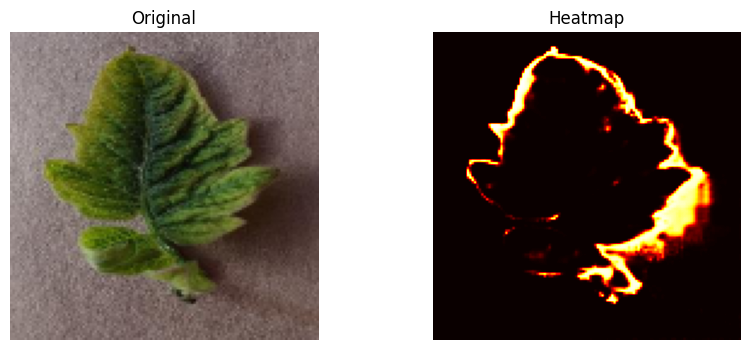

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


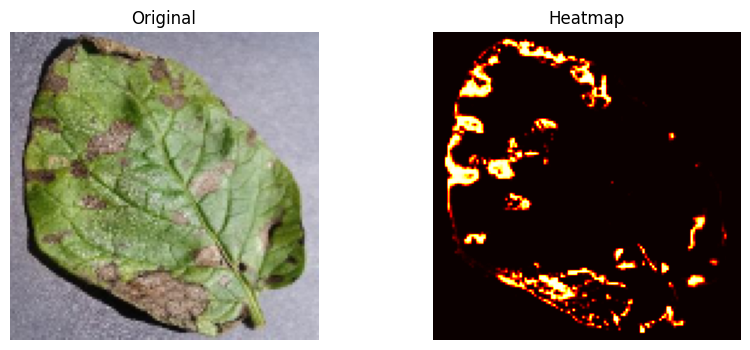

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


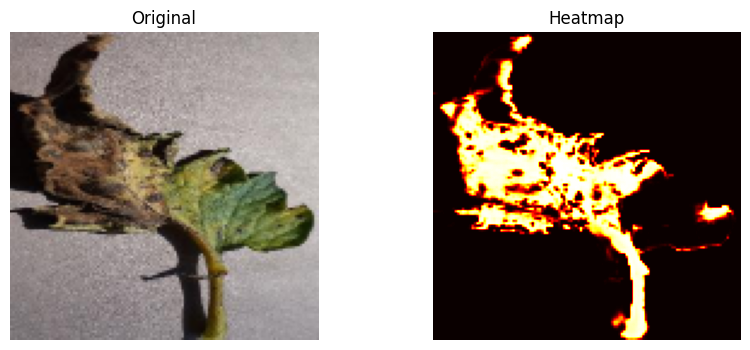

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


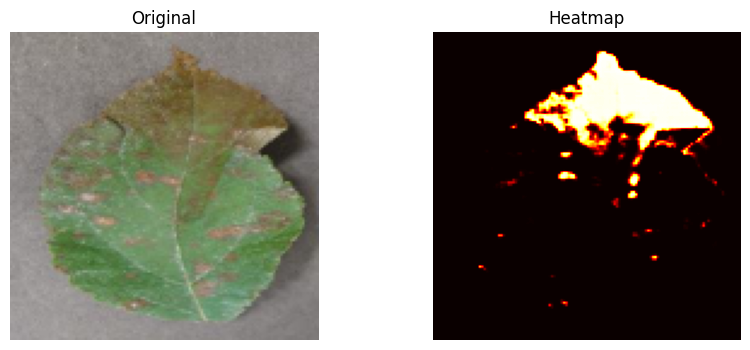

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


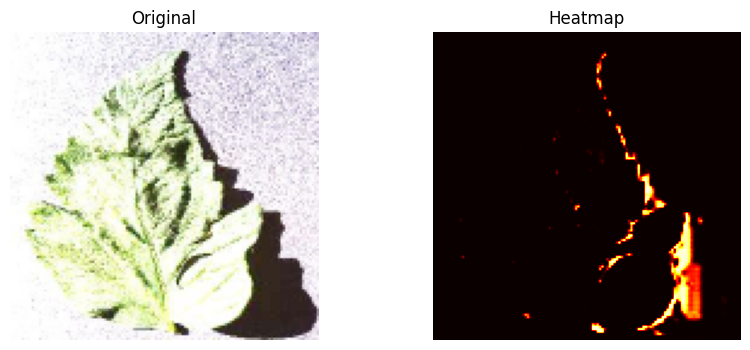

In [ ]:
#  Load and Predict on Each Image
for i, image_path in enumerate(image_paths):
    img_rgb, img_input = preprocess_image(image_path)
    
    pred = model.predict(np.expand_dims(img_input, axis=0))[0]
    heatmap = pred.squeeze()
    binary_mask = (heatmap > 0.5).astype(np.uint8)

    unhealthy_area = np.sum(binary_mask)
    if unhealthy_area < 200:
        continue

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(heatmap, cmap='hot')
    plt.title("Heatmap")
    plt.axis("off")

    plt.show()

